In [1]:
#importing pacakges
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score, roc_auc_score, cohen_kappa_score
import pickle

In [2]:
# We are reading our data
df = pd.read_csv("C:/Users/NEIST/Desktop/Pre/main_datasets/MI_dataset_100.csv")

In [3]:
# First 5 rows of our data
df

,BCUTv-1l,BCUTi-1h,BCUTp-1l,BCUTZ-1l,BCUTd-1h,BCUTare-1l,BCUTs-1l,BCUTse-1l,BCUTpe-1l,PEOE_VSA9,...,piPC4,ETA_dEpsilon_D,GATS1se,SRW09,SMR_VSA6,AATS1i,MDEC-22,VR1_DzZ,VR3_Dzpe,target
0,14.701776,14.557741,0.744080,5.748825,3.218349,2.238180,1.240005,2.479451,2.284833,12.710848,...,4.754667,0.492929,0.839738,6.580639,6.606882,151.382734,2.249577,74.441211,4.780763,1
1,14.700550,13.644287,0.741446,5.679853,3.258335,2.178923,1.143745,2.424758,2.228722,39.958147,...,5.547129,0.364441,0.878124,7.412764,34.729217,144.347348,3.452842,200.587788,6.399368,1
2,13.304117,17.424774,0.545839,5.666628,3.296716,2.162280,1.195097,2.406729,2.211106,30.297854,...,5.873877,0.391712,0.714820,6.555357,25.161346,145.867240,8.909374,264.575821,6.887221,1
3,13.304118,17.424774,0.545842,5.666628,3.296579,2.162280,1.195097,2.406729,2.211106,30.297854,...,5.845354,0.391628,0.728963,6.293419,31.706102,145.969189,11.311909,255.023211,6.823125,1
4,13.304116,17.424774,0.545837,5.666628,3.296716,2.162280,1.195097,2.406729,2.211106,36.842611,...,5.873877,0.394348,0.752570,6.555357,31.768228,146.451896,7.129081,264.364066,6.886408,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2353,13.304122,17.424767,0.546071,5.883844,4.032418,1.994006,0.291268,2.424025,2.114058,0.000000,...,2.564949,0.891262,1.334922,0.000000,0.000000,157.070869,0.000000,27.188622,3.195376,0
2354,14.705903,14.565372,0.775868,5.762599,3.267801,2.247387,1.220651,2.485813,2.292618,13.437118,...,5.125079,0.586268,1.090520,6.842683,26.057229,155.863963,3.950551,96.533105,5.212012,0
2355,15.584269,14.558553,0.996165,5.671568,3.309310,2.167403,1.257100,2.411225,2.216060,17.360722,...,5.541509,0.437346,1.043889,6.861711,5.733667,149.161023,5.171982,94.305802,5.134497,1
2356,14.702534,14.565388,0.748758,5.756853,3.269475,2.240717,1.419059,2.478957,2.285506,12.934202,...,5.188433,0.624077,1.035548,6.842683,12.340549,158.114543,4.832410,75.087040,4.788936,0


In [4]:
df.target.value_counts()

1    1702
0     656
Name: target, dtype: int64

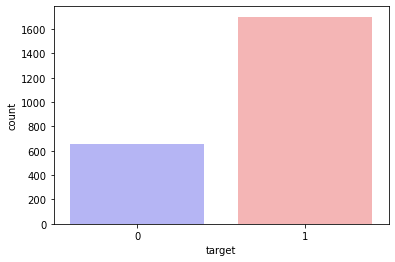

In [5]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

In [6]:
countNoDisease = len(df[df.target == False])
countHaveDisease = len(df[df.target == True])
print("Percentage of values with False: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of values with True: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of values with False: 27.82%
Percentage of values with True: 72.18%


In [7]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)

In [8]:
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [10]:
#x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size = 0.10,random_state=0)

In [11]:
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T
#x_val = x_val.T
#y_val = y_val.T

In [12]:
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
acc = lr.score(x_test.T,y_test.T)*100
predictions = lr.predict(x_test.T)
predictions_tr = lr.predict(x_train.T)
acc = lr.score(x_test.T,y_test.T)*100
acc_tr =lr.score(x_train.T,y_train.T)*100
print(acc)
print(acc_tr)
##predictions_val = lr.predict(x_val.T)
#acc_val =lr.score(x_val.T,y_val.T)*100
#print(acc_val)

81.77966101694916
80.11664899257688


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
cf =(confusion_matrix(y_test, predictions))
#cf_val =(confusion_matrix(y_val, predictions_val))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
#print(confusion_matrix(y_train, predictions_tr))
#print(classification_report(y_train, predictions_tr))
#print(confusion_matrix(y_val, predictions_val))
#print(classification_report(y_val, predictions_val))

[[ 56  60]
 [ 26 330]]
              precision    recall  f1-score   support

           0       0.68      0.48      0.57       116
           1       0.85      0.93      0.88       356

    accuracy                           0.82       472
   macro avg       0.76      0.70      0.73       472
weighted avg       0.81      0.82      0.81       472



In [14]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=lr, X=x_train.T, y=y_train.T, cv=10)
print(accuracies)
print(accuracies.mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[0.8042328  0.79365079 0.80952381 0.76190476 0.80952381 0.7989418
 0.78723404 0.77659574 0.79255319 0.80851064]
0.7942671394799055


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [15]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, predictions)

0.465593743100631

In [16]:
#from sklearn.metrics import matthews_corrcoef
#matthews_corrcoef(y_val, predictions_val)

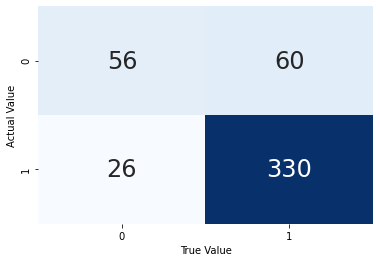

In [17]:
cf_plt =sns.heatmap(cf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
cf_plt.set(xlabel = "True Value", ylabel ="Actual Value")
cf_plt

In [18]:
#cf_plt =sns.heatmap(cf_val,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
#cf_plt.set(xlabel = "True Value", ylabel ="Actual Value")
#cf_plt

In [19]:
#parameters
r_auc_score = roc_auc_score(y_test, predictions)
print('AUC = %0.3f' % r_auc_score)
rsquare = r2_score(y_test, predictions)
print('R2 = %0.3f' % rsquare)
#mae = mean_absolute_error(y_test, predictions)
#print('MAE = %0.3f)' % mae)
mse = mean_squared_error(y_test, predictions)
print('MSE = %0.3f' % mse)
mbe = np.mean(predictions - y_test)
print('MBE = %0.3f'% mbe)
rmse = mse** (1/2)
print('RMSE = %0.3f' % rmse)
variance = np.var(predictions)
print('Variance = %0.3f'% variance)
sse = np.mean((np.mean(predictions) - y)** 2)
bias = sse - variance
print('Bias = %0.3f'% bias)
kappa = cohen_kappa_score(y_test, predictions)
print('Kappa = %0.3f'% kappa)

AUC = 0.705
R2 = 0.017
MSE = 0.182
MBE = 0.072
RMSE = 0.427
Variance = 0.144
Bias = 0.068
Kappa = 0.455


In [20]:
#fall out
FP = cf.sum(axis=0) - np.diag(cf) 
FN = cf.sum(axis=1) - np.diag(cf)
TP = np.diag(cf)
TN = cf.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
#TPR = TP/(TP+FN)
# Specificity or true negative rate
#TNR = TN/(TN+FP) 
# Precision or positive predictive value
#PPV = TP/(TP+FP)
# Negative predictive value
#NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
#ACC = (TP+TN)/(TP+FP+FN+TN)
print(FPR)
print(FNR)
print(FDR)

[0.07303371 0.51724138]
[0.51724138 0.07303371]
[0.31707317 0.15384615]


In [21]:
print("complete")

complete
